In [78]:
import numpy as np
from scipy.linalg import pinv
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


#### Exercício 1

dict_keys(['trueClass', 'estClass'])
(1400,)
Número de pontos positivos:  280
Número de pontos negativos:  1120
Número de pontos classificados como positivos:  406
Número de pontos classificados como negativos:  994

Matriz de Confusão: 
 [[938 182]
 [ 56 224]]

Verdadeiros Positivos:  224
Falsos Positivos:  182
Total Positivos:  280

Verdadeiros Negativos:  938
Falsos Negativos:  56
Total Negativos:  1120


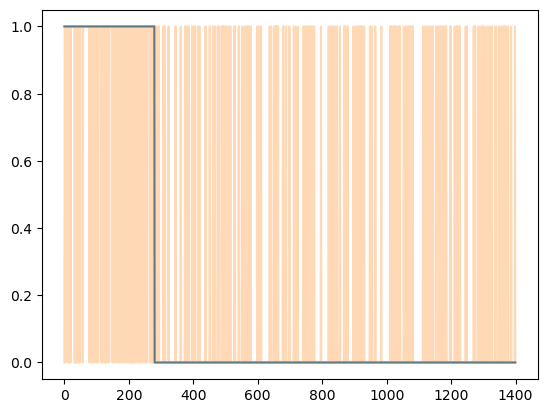

In [54]:
fN = '/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha2/A39275_Q001_data.p'

D = pickle.load(open(fN, 'rb'))

print(D.keys())

classe = D['trueClass']
classeEstimada = D['estClass']

print(classe.shape)

print("Número de pontos positivos: ", np.sum(classe == 1))
print("Número de pontos negativos: ", np.sum(classe == 0))

print("Número de pontos classificados como positivos: ", np.sum(classeEstimada == 1))
print("Número de pontos classificados como negativos: ", np.sum(classeEstimada == 0))


CM = confusion_matrix(classe, classeEstimada)
print("")
print("Matriz de Confusão: \n", CM)
#print("Verdadeiros Positivos: ", np.sum(classe[classe==1] == classeEstimada[classeEstimada==1]))

plt.plot(classe)
plt.plot(classeEstimada, alpha=0.3)

TP = CM[1][1]
FP = CM[0][1]
TN = CM[0][0]
FN = CM[1][0]

print("")
print("Verdadeiros Positivos: ", TP)
print("Falsos Positivos: ", FP)
print("Total Positivos: ", TP + FN)
print("")
print("Verdadeiros Negativos: ", TN)
print("Falsos Negativos: ", FN)
print("Total Negativos: ", TN + FP)


In [55]:
# (a)
alarme = FP/(FP+TN)
recall = TP/(TP+FN)
print("Falsos Positivos (falsos alarmes): ", alarme)
print("Recall: ", np.round(recall, 3))

Falsos Positivos (falsos alarmes):  0.1625
Recall:  0.8


In [56]:
# (b)
acertosPositivos_percentagem = (TP / (TP + FN))*100
acertosNegativos_percentagem = (TN / (TN + FP))*100

print("Percentagem acertos positivos: ", np.round(acertosPositivos_percentagem, 1), "%")
print("Percentagem acertos negativos: ", np.round(acertosNegativos_percentagem, 1), "%")




Percentagem acertos positivos:  80.0 %
Percentagem acertos negativos:  83.8 %


In [57]:
# (c)
print("Verdadeiros Negativos: ", np.round(TN, 0))
print("Falsos Positivos: ", np.round(FP, 0))

Verdadeiros Negativos:  938
Falsos Positivos:  182


In [58]:
target_names = ["Negativos", "Positivos"]
report = classification_report(classe, classeEstimada, target_names=target_names)

print("Report de Classificação: \n", report)

Report de Classificação: 
               precision    recall  f1-score   support

   Negativos       0.94      0.84      0.89      1120
   Positivos       0.55      0.80      0.65       280

    accuracy                           0.83      1400
   macro avg       0.75      0.82      0.77      1400
weighted avg       0.87      0.83      0.84      1400



#### Exercício 2

In [69]:
fN = '/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha2/A39275_Q002_data.p'

D = pickle.load(open(fN, 'rb'))

print(D.keys())

trueClass = D['trueClass']

trueClassTrain = D['trueClassTrain']
Xtrain = D['Xtrain']

trueClassTest = D['trueClassTest']
Xtest = D['Xtest']


print (trueClass.shape, trueClassTrain.shape, Xtrain.shape, trueClassTest.shape, Xtest.shape)


def metrica(x, y): 
    m = np.array([np.array([1,-2]) , np.array([1,1])])
    return np.dot(np.dot((x-y).T, m), (x-y))

k = 11

knn = KNeighborsClassifier(n_neighbors=k, metric=metrica, algorithm='brute').fit(Xtrain.T, trueClassTrain)
yTestePredicted = knn.predict(Xtest.T)

# (a)
print("Matriz de confusão: \n", confusion_matrix(trueClassTest, yTestePredicted))



dict_keys(['trueClass', 'trueClassTrain', 'Xtrain', 'trueClassTest', 'Xtest'])
(563,) (140,) (2, 140) (423,) (2, 423)
Matriz de confusão: 
 [[178   0  17]
 [  0  93   0]
 [ 11   0 124]]


In [70]:
# (b)
print("Número total de erros: ", np.sum(trueClassTest != yTestePredicted))

Número total de erros:  28


#### Exercício 3

In [72]:
X = np.array([np.array([-6, -4, -2, -6, 2, 1, 5, 3, 4]), np.array([1, 3, 4, 4, 1, 3, 3, 4, 0])])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

print(X.shape)
print(y.shape)

(2, 9)
(9,)


In [87]:
# (a)

amostras = np.array([np.array([-4, 1]), np.array([-3, -3])])
print("Amostras: \n", amostras)

X0 = X[:, y==0]
X1 = X[:, y==1]

m0 = np.mean(X0, axis=1)
m1 = np.mean(X1, axis=1)

print(X0.shape, X1.shape)
print(m0, m1)

cov0 = np.cov(X0)
cov1 = np.cov(X1)
print("Covariancia 0: \n", cov0, "\nCovariancia 1: \n", cov1)

S0i = pinv(cov0)
S1i = pinv(cov1)
print("Covariancia Invertida 0: \n", SI0, "\nCovariancia Invertida 1: \n", SI1)


D0 =  np.sqrt(np.sum((amostras-m0[:, np.newaxis])*np.dot(S0i, (amostras-m0[:, np.newaxis])), axis=0))
D1 =  np.sqrt(np.sum((amostras-m1[:, np.newaxis])*np.dot(S1i, (amostras-m1[:, np.newaxis])), axis=0))

D = np.vstack((D0, D1))

y2e = np.argmin(D, axis=1)

print("O ponto (", amostras[0, 0], ", ", amostras[1, 0], ") foi classificado na classe ", y2e[0])
print("O ponto (", amostras[0, 1], ", ", amostras[1, 1], ") foi classificado na classe ", y2e[1])

Amostras: 
 [[-4  1]
 [-3 -3]]
(2, 4) (2, 5)
[-4.5  3. ] [3.  2.2]
Covariancia 0: 
 [[3.66666667 1.33333333]
 [1.33333333 2.        ]] 
Covariancia 1: 
 [[ 2.5  -0.25]
 [-0.25  2.7 ]]
Covariancia Invertida 0: 
 [[ 0.36 -0.24]
 [-0.24  0.66]] 
Covariancia Invertida 1: 
 [[0.40373832 0.03738318]
 [0.03738318 0.37383178]]
O ponto ( -4 ,  -3 ) foi classificado na classe  0
O ponto ( 1 ,  -3 ) foi classificado na classe  1


In [ ]:
# (b)


